<a href="https://colab.research.google.com/github/Cristinamulas/NLP_HW_Fordham_University/blob/master/Cristina_MulasHW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework No. 3
- CISC 6210 Natural Language
- Date : 09/10/2020
- Cristina Mulas

In [ ]:
# import libraries
import re
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer
stemming = PorterStemmer()
import warnings
from nltk.tokenize import TreebankWordTokenizer
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/"Shared drives"/CISC6210NLPFall20/Electronics


negative.review  positive.review  unlabeled.review


#Part 1

In [ ]:
def extract_reviews(path):
  """ It takes a path and return the review text"""
  with open( path,"r", encoding='latin-1') as file:
    test_file = file.read()
    test_file = test_file.replace('\n','').lower()
    review_text = re.findall(r"<review_text>(.*?)</review_text>", test_file)  
    return review_text 

In [ ]:

def remove_stop_words_stem(text):
  " it takes an str return a list of tokenize w/o stop words and stemming"
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  tokens = tokenizer.tokenize(text)
  tokens_without_sw_stem = [stemming.stem(word) for word in tokens if not word in list(set(stopwords.words('english')))]
  return tokens_without_sw_stem

In [ ]:
def token_stem (text):
  " it takes a str and  return a list of tokens with stemming"

  tokenizer = nltk.RegexpTokenizer(r"\w+")
  tokens = tokenizer.tokenize(text)
  token_w_stem = [stemming.stem(token) for token in tokens]
  return token_w_stem

In [ ]:
def cloud(text, number, tokens):
  "takes a str an int and a str and return a WordCloud plot"
  data_analysis = nltk.FreqDist(text)
  filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])
  wcloud = WordCloud(max_words=number).generate_from_frequencies(filter_words)
  fig = plt.figure(1, figsize=(12, 12))
  plt.imshow(wcloud, interpolation="bilinear")
  plt.axis("off")
  plt.title(f'WordCould {tokens} stop words with {number} tokens')
  (-0.5, 399.5, 199.5, -0.5)
  plt.show()

## Positive Reviews

In [ ]:
reviews_positive = extract_reviews('/content/drive/Shared drives/CISC6210NLPFall20/Electronics/positive.review')

In [ ]:
tokens_stem_positive = remove_stop_words_stem(str(reviews_positive))

### Word Clouds Without Stop Words

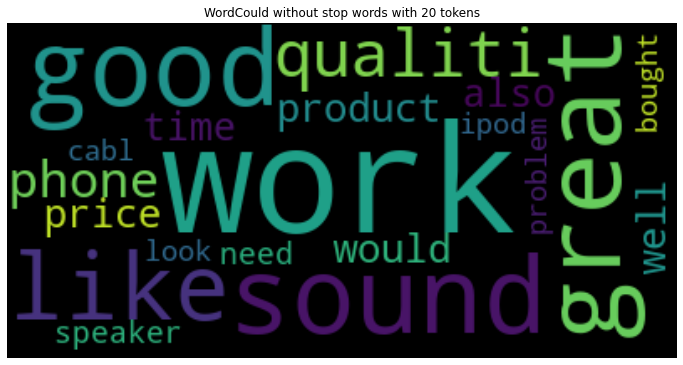

In [ ]:
cloud(tokens_stem_positive, 20, "without")

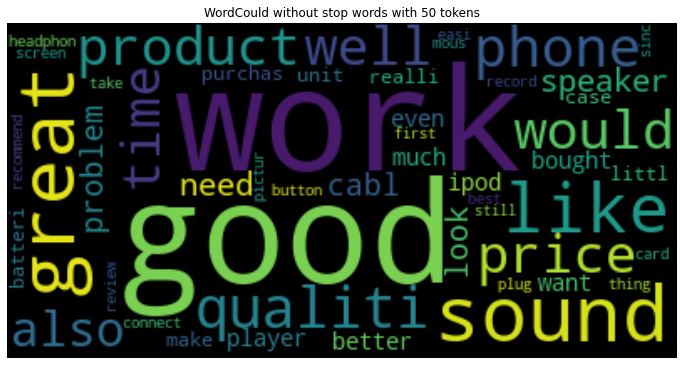

In [ ]:
cloud(tokens_stem_positive, 50, "without")

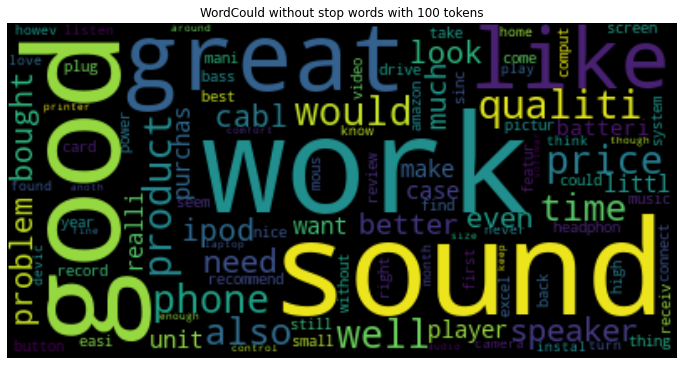

In [ ]:
cloud(tokens_stem_positive, 100, "without")

### Word Clouds With Stop Words




In [ ]:
tokens_withsw_positive = token_stem(str(reviews_positive))

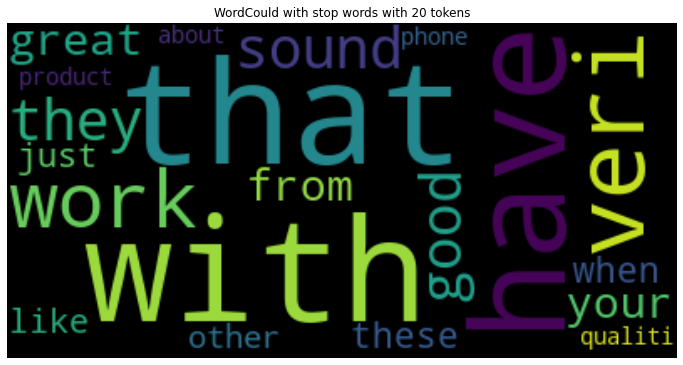

In [ ]:
cloud(tokens_withsw_positive, 20, "with")

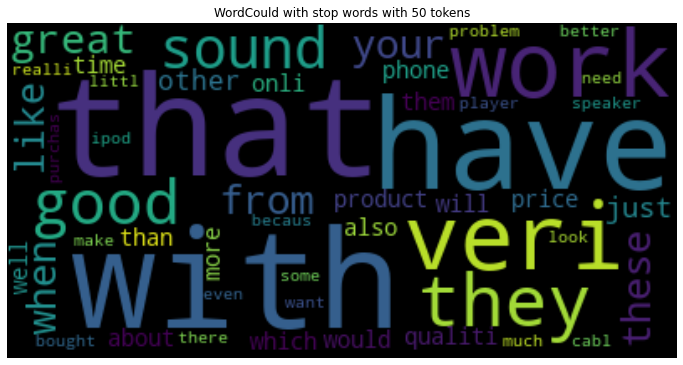

In [ ]:
cloud(tokens_withsw_positive, 50, "with")

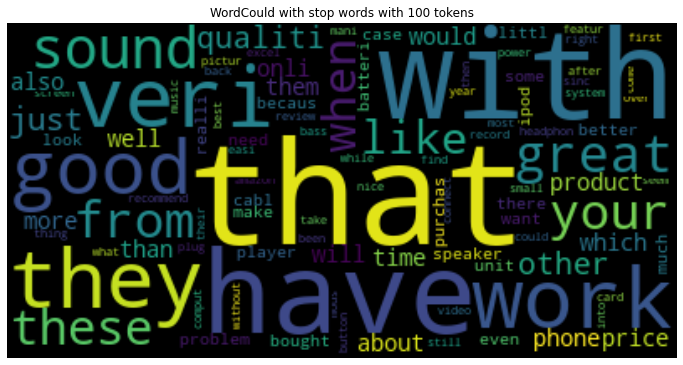

In [ ]:
cloud(tokens_withsw_positive, 100, "with")

## Negative Reviews

In [ ]:
reviews_negative = extract_reviews('/content/drive/Shared drives/CISC6210NLPFall20/Electronics/negative.review')

In [ ]:
tokens_stem_negative = remove_stop_words_stem(str(reviews_negative))

### Word Clouds Without Stop Words

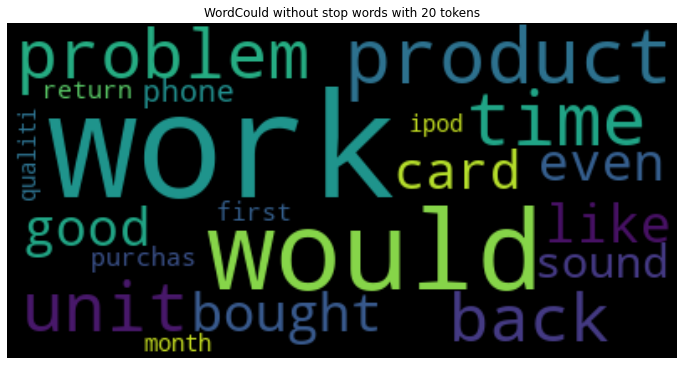

In [ ]:
cloud(tokens_stem_negative, 20, "without")

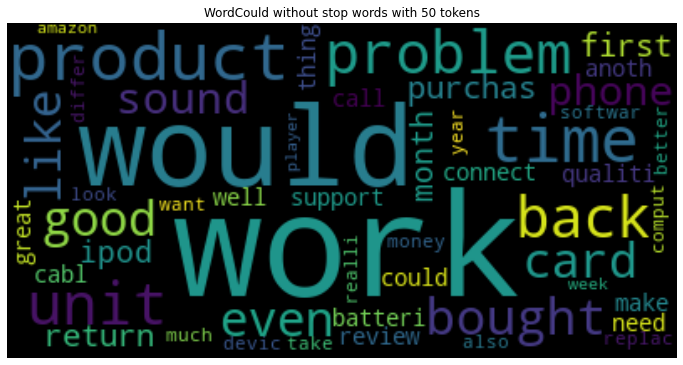

In [ ]:
cloud(tokens_stem_negative, 50, "without")

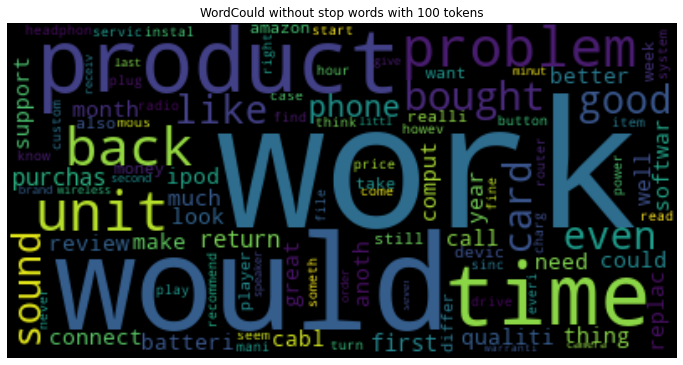

In [ ]:
cloud(tokens_stem_negative, 100, "without")

### Word Clouds With Stop Words


In [ ]:
tokens_withsw_negative = token_stem(str(reviews_negative))

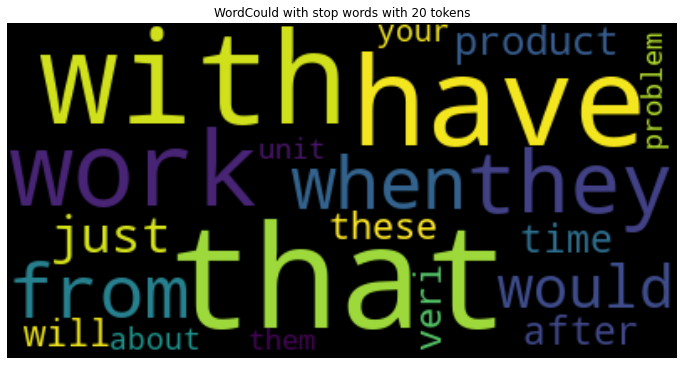

In [ ]:
cloud(tokens_withsw_negative, 20, "with")

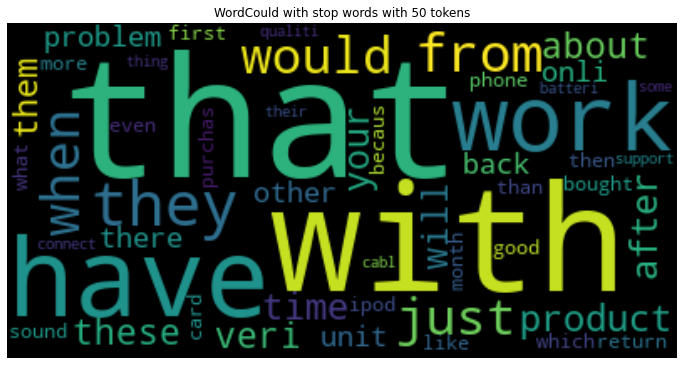

In [ ]:
cloud(tokens_withsw_negative, 50, "with")

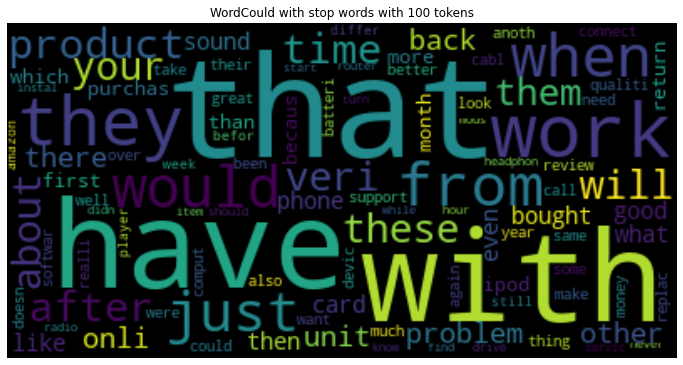

In [ ]:
cloud(tokens_withsw_negative, 100, "with")

## Create frequencies for positive and negative reviwes wo Stop Words





In [ ]:
def countWords(list_):
  " it takes a list of str and return a dict"
  dic={}
  for x in list_:
       if not x in  dic:        
          dic[x] = list_.count(x)
  return dic

In [ ]:
def frequecy_positive_negative_reviews (tokens_positive, tokens_negative):
  " it takes a two lists of str and return a dict woth the common words in ascengind order"
  unique_words_both = set(tokens_positive) & set(tokens_negative) 
  positive_dict = countWords(tokens_positive) # returns a dict for positive reviews wo stop words
  negative_dict = countWords(tokens_negative) # returns a dict for negative reviews wo stop words
  dict_of_common_words = dict() # create a container dict
  for word in unique_words_both: 
        dict_of_common_words[word] = (positive_dict[word],) , (negative_dict[word],)

  sort_dict_of_common_words = sorted(dict_of_common_words.items(), key=lambda x: x[1], reverse=True) # sort the dict in ascd
  return sort_dict_of_common_words 


In [ ]:
frequecy_positive_negative_reviews(tokens_stem_positive, tokens_stem_negative)

[('use', ((851,), (552,))),
 ('one', ((505,), (523,))),
 ('work', ((440,), (718,))),
 ('good', ((415,), (247,))),
 ('sound', ((415,), (234,))),
 ('great', ((412,), (156,))),
 ('get', ((352,), (471,))),
 ('like', ((323,), (242,))),
 ('qualiti', ((290,), (183,))),
 ('phone', ((275,), (233,))),
 ('product', ((274,), (369,))),
 ('would', ((269,), (377,))),
 ('price', ((269,), (102,))),
 ('well', ((266,), (163,))),
 ('time', ((254,), (353,))),
 ('also', ((249,), (137,))),
 ('speaker', ((242,), (86,))),
 ('need', ((236,), (156,))),
 ('buy', ((218,), (278,))),
 ('look', ((216,), (145,))),
 ('cabl', ((214,), (176,))),
 ('problem', ((212,), (291,))),
 ('bought', ((206,), (258,))),
 ('ipod', ((200,), (195,))),
 ('go', ((196,), (190,))),
 ('2', ((186,), (186,))),
 ('better', ((186,), (152,))),
 ('set', ((185,), (150,))),
 ('even', ((183,), (243,))),
 ('much', ((180,), (150,))),
 ('player', ((180,), (121,))),
 ('want', ((178,), (136,))),
 ('purchas', ((172,), (221,))),
 ('realli', ((172,), (134,))

## Create frequencies for positive and negative reviwes with Stop Words

In [ ]:
frequecy_positive_negative_reviews(tokens_withsw_positive, tokens_withsw_negative)

[('the', ((6007,), (5993,))),
 ('i', ((3629,), (4072,))),
 ('and', ((2924,), (2796,))),
 ('to', ((2786,), (3078,))),
 ('a', ((2691,), (2524,))),
 ('it', ((2522,), (2893,))),
 ('is', ((1866,), (1578,))),
 ('of', ((1572,), (1551,))),
 ('for', ((1469,), (1210,))),
 ('thi', ((1364,), (1515,))),
 ('you', ((1195,), (968,))),
 ('in', ((1187,), (1124,))),
 ('that', ((1179,), (1266,))),
 ('with', ((1147,), (993,))),
 ('my', ((1142,), (1089,))),
 ('on', ((975,), (962,))),
 ('have', ((963,), (932,))),
 ('use', ((851,), (552,))),
 ('t', ((702,), (900,))),
 ('but', ((697,), (834,))),
 ('are', ((665,), (437,))),
 ('as', ((654,), (443,))),
 ('not', ((638,), (1005,))),
 ('s', ((635,), (489,))),
 ('wa', ((597,), (882,))),
 ('so', ((517,), (493,))),
 ('be', ((514,), (557,))),
 ('one', ((505,), (523,))),
 ('can', ((462,), (336,))),
 ('if', ((450,), (457,))),
 ('or', ((446,), (430,))),
 ('veri', ((444,), (335,))),
 ('work', ((440,), (718,))),
 ('they', ((415,), (582,))),
 ('good', ((415,), (247,))),
 ('so

- After inspecting the word frequencies of the reviews with and without stop words, I see that the stops words have the highest frequencies in the dictionary, that means we need to remove them because they don't provide much information about the opinions of the reviews. I think that they are not relevant for the sentiment analysis task. They don't have any meaning in  the context of the reciew.

# Part 2

In [ ]:
df = pd.DataFrame() # create a df
df['review'] = pd.concat([pd.Series(reviews_positive),pd.Series(reviews_negative)]) # append positive an nevative reviews
df['rating'] = 'Positive' # create a label for positve
df['rating'][1000:] = 'Negative' # create a label for negative


In [ ]:
# vectorization with TFIDF
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range = (1,2),stop_words='english')
tfidfv = tfidf.fit_transform(df['review']).toarray()


In [ ]:
# vectorization with WordCountizer
word_count = CountVectorizer(binary = True, stop_words='english')
word_countv = word_count.fit_transform(df['review']).toarray()

In [ ]:
def classifier_metrix (vectorizer, clf):
  "it takes a vectorization and a classifier and return the metrics"
  X_train, X_test, y_train, y_test = train_test_split(vectorizer, df['rating'], test_size=0.2, random_state = 42)
  model = clf.fit(X_train, y_train)
  y_pred_class = model.predict(X_test)

  precision,recall,fscore,support = metrics.precision_recall_fscore_support(y_test, y_pred_class, average = 'weighted')
  print(classification_report(y_test, y_pred_class))
  return (precision,recall,fscore)



### Results for TFIDF vectorization

In [ ]:
# MultinomialNB
classifier_metrix(tfidfv,MultinomialNB())

              precision    recall  f1-score   support

    Negative       0.82      0.85      0.84       201
    Positive       0.84      0.81      0.83       199

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



(0.8328786057692307, 0.8325, 0.8324340134693189)

In [ ]:
# LogisticRegression
classifier_metrix(tfidfv,LogisticRegression())

              precision    recall  f1-score   support

    Negative       0.81      0.83      0.82       201
    Positive       0.82      0.80      0.81       199

    accuracy                           0.81       400
   macro avg       0.82      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400



(0.8151075672295184, 0.815, 0.8149722437548449)

### Results for WordCount vectorization

In [ ]:
# MultinomialNB
classifier_metrix(word_countv,MultinomialNB())

              precision    recall  f1-score   support

    Negative       0.78      0.86      0.82       201
    Positive       0.84      0.76      0.80       199

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



(0.8102108585858586, 0.8075, 0.8070186263388465)

In [ ]:
# LogisticRegression
classifier_metrix(word_countv,LogisticRegression())

              precision    recall  f1-score   support

    Negative       0.79      0.81      0.80       201
    Positive       0.80      0.78      0.79       199

    accuracy                           0.80       400
   macro avg       0.80      0.79      0.79       400
weighted avg       0.80      0.80      0.79       400



(0.7950975609756098, 0.795, 0.794969243079693)

- TFIDF vectorizer performs better than Word Count Vecotrizer in both models. 
- MultinomialNB classifier perform slightly better than Logistic Regresion.
- Both classifier have a higher prediction of both classes because we dont have class imbalance in this dataset.

# Part 3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidfv, df['rating'], test_size=0.2, random_state = 42) # split the data into train and test using 80/20 split
lg = LogisticRegression() #LG model
model = lg.fit(X_train, y_train) # train the data


In [ ]:
feature = tfidf.get_feature_names()  # get the names of the veztorizer
feature_names = np.asarray(feature) # converted in an array

In [ ]:
negative_words = np.argsort(model.coef_[0])[:30] # sort the values for negative words
negative = list(feature_names[negative_words])


In [ ]:
def show_wordcloud(data): 
  " it takes a list and return a wordcloud plot"
  wordcloud = WordCloud( collocations=False,
        background_color='black',
        max_words=20,
        max_font_size=50, 
        scale=4
    ).generate(str(data))

  fig = plt.figure(1, figsize=(12, 12))
  plt.axis('off')
  plt.imshow(wordcloud)
  plt.show()

### Most important negative words for LG with TFIDF

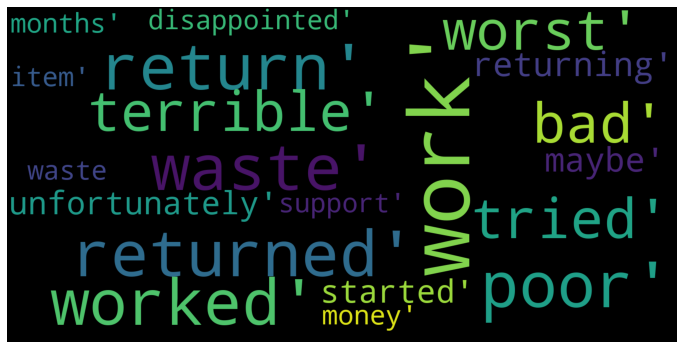

In [ ]:
show_wordcloud(negative)


In [ ]:
positive_words = np.argsort(model.coef_[0])[-30:] # sort the values for positive words
positive = list(feature_names[positive_words])


### Most important positive words for LG with TFIDF

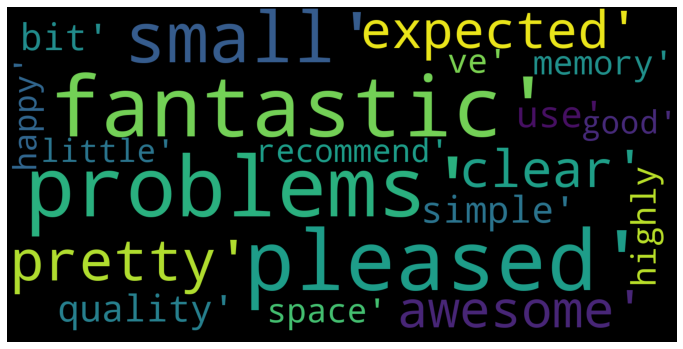

In [ ]:
show_wordcloud(positive)
